In [33]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import glob
import numpy as np
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/supp_validation/'

Populating the interactive namespace from numpy and matplotlib


In [34]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    total = 0
    
    folder = 't32'
    fig_num = 0
    pers = [2,3,4] #,3,4
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray']
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1)
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
    
    color_dic_opt={}
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
             
    dic_means = {}
    dic_legend = {}
    dic_diff_min = {}
    dic_diff_max = {}
    dic_num_loci = {}

    for per in pers:
        dic_means[per] = {}
        dic_legend[per] = {}
        dic_diff_min[per] = {}
        dic_diff_max[per] = {}
        dic_num_loci[per] = {}
        for motif in motif_dic[per]:
            dic_means[per][motif] = [-1] * len(opt_dic[per])
            dic_legend[per][motif] = opt_dic[per]
            dic_diff_min[per][motif] = [0] * len(opt_dic[per])
            dic_diff_max[per][motif] = [0] * len(opt_dic[per])
            dic_num_loci[per][motif] = [0] * len(opt_dic[per])
   
    spacing = 8
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        minimum = 100
        maximum = -100
        opt_alleles = opt_dic[per]
        print('Running period: %d'%(per))
        list_of_mean = []
        errors = []
        legend_labels = []
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            file_list = glob.glob('./results/results/%s/per_%d_*opt_%s.txt'%(folder, per, opt_string) )
            file_list.sort() 
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                #print(filename)
                #print(len(lines))
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = int(info[2]) 
                line = lines[2]
                info = line.strip().split(': ')
                motif = info[2]
                motif = motif.strip().split(' ')
                motif = motif[0]
                opt_allele = int(info[3])
                if motif != '1.0' and motif != '0.0':
                
                    dic_num_loci[per][motif][opt-opt_alleles[0]]= num_loci
                        
                
        # PLOT HISTOGRAM OF NUM LOCI
        #fig, (ax1, ax2) = plt.subplots(2, sharex=True)
        
        
        #fig_num = fig_num + 1
        #fig = plt.figure(fig_num)
        #fig.set_size_inches((12, 8))
        fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,10))
        
        #fig.suptitle('Period %d'%(per),size=15)
        ax1 = axs[0]
        ax2 = axs[1]
        #fig.suptitle('Period %d'%(per),size=15)
        #ax1 = fig.add_subplot(211)
        
        #fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 2)) #
            
        offset = 0
        median_pos = int(len(dic_means[per])/2)
        i = 0
        for motif in dic_means[per]:
            
            list_of_num_loci = dic_num_loci[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))
            #plt.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=motif)  
            ax1.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=motif)  
            offset = offset + 1
            
        #plt.ylabel("Number of loci",size=15)
        #plt.yticks(size=15)
        #plt.xticks([])
        #plt.title('Period %d'%(per),size=15)
        
        ax1.set_ylabel("Number of loci",size=15)
        ax1.tick_params(labelsize=15)
        ax1.set_xticks([])
        ax1.set_title('Period %d'%(per),size=15)
        # Plot mean +/- ABC 95% CI
        #fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 6)) #
        #ax2 = fig.add_subplot(212)
        
            
        
        ax1.legend(bbox_to_anchor=(1.1, 1.1))

        #plt.axvline(x=2.5, linestyle = '--',c='black')
        #plt.axvline(x=5.5, linestyle = '--',c='black')
        #plt.axvline(x=8.5, linestyle = '--',c='black')
        #plt.text(0.2,10**-7.7,'Mean s=' + r'$10^{-5}$',size=15)
        #plt.text(3.2,10**-7.7,'Mean s=' + r'$10^{-4}$',size=15)
        #plt.text(6.2,10**-7.7,'Mean s=' + r'$10^{-3}$',size=15)
        #plt.text(9.2,10**-7.7,'Mean s=' + r'$10^{-2}$',size=15)
        #plt.text(4.7,10**-8,'Ground truth a,b',size=15)
        '''
        plt.text(0.7,10**-7.7,r'$s=10^{-5}$',size=15)
        plt.text(3.7,10**-7.7,r'$s=10^{-4}$',size=15)
        plt.text(6.7,10**-7.7,r'$s=10^{-3}$',size=15)
        plt.text(9.7,10**-7.7,r'$s=10^{-2}$',size=15)
        '''
        
        fig.tight_layout()
        #plt.legend()
        #plt.savefig(PLOTDIR + 'joint_validation.pdf',bbox_inches='tight')
        print(total)

Running main
Running period: 2
0
Running period: 3
0
Running period: 4
0
CPU times: user 516 ms, sys: 33.9 ms, total: 550 ms
Wall time: 547 ms


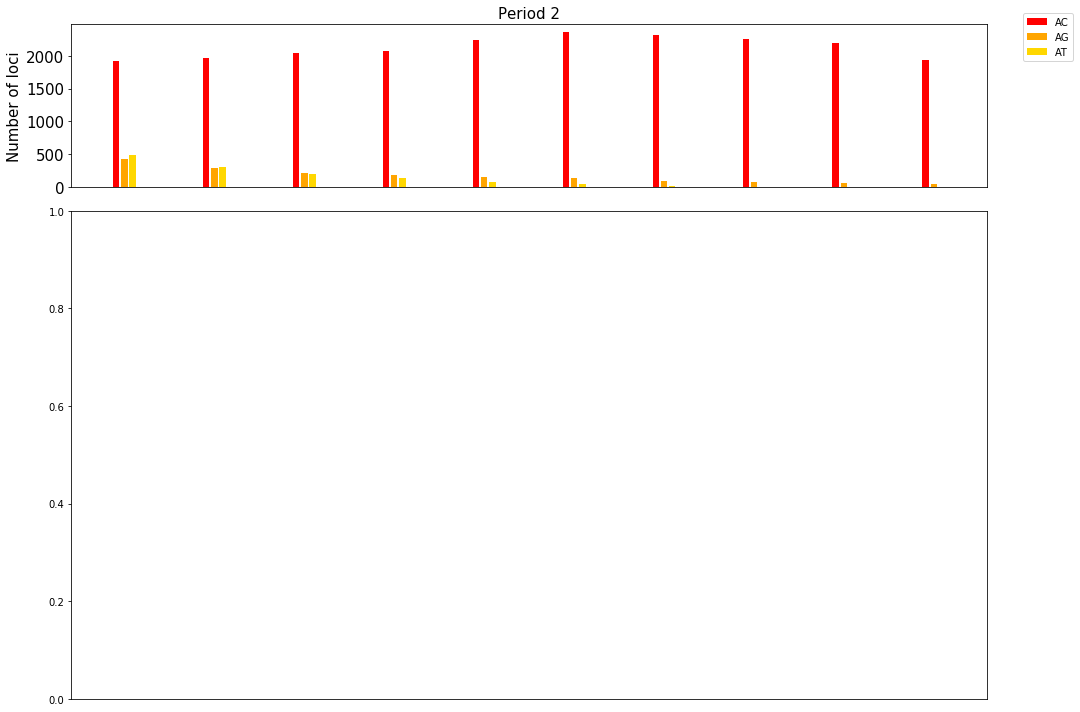

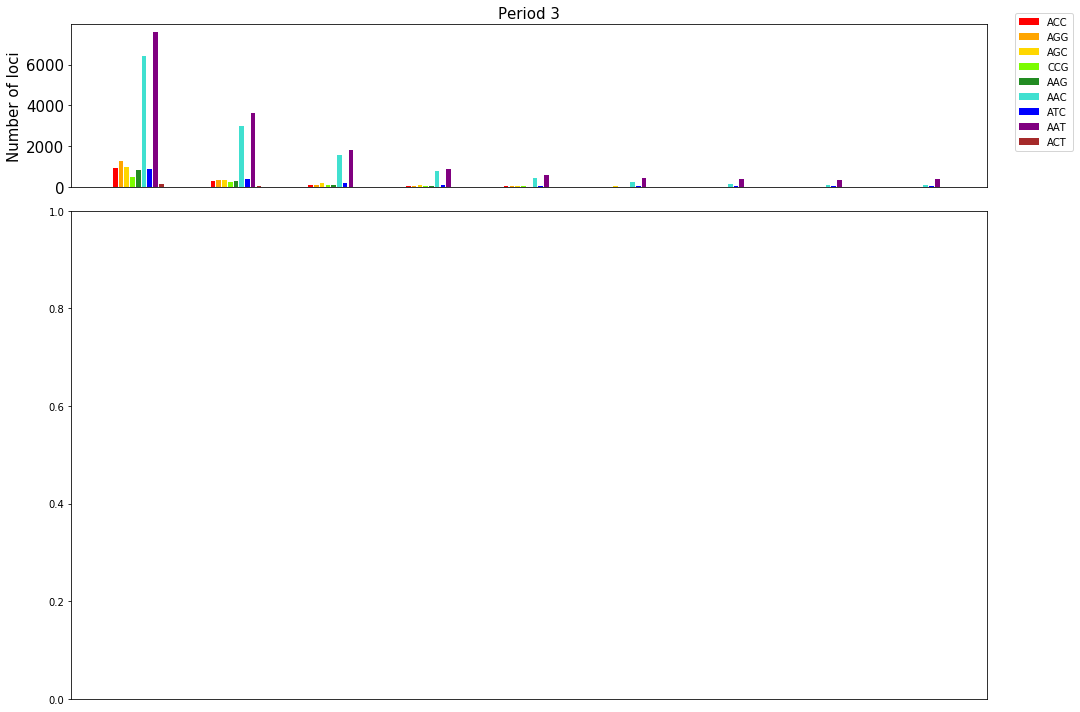

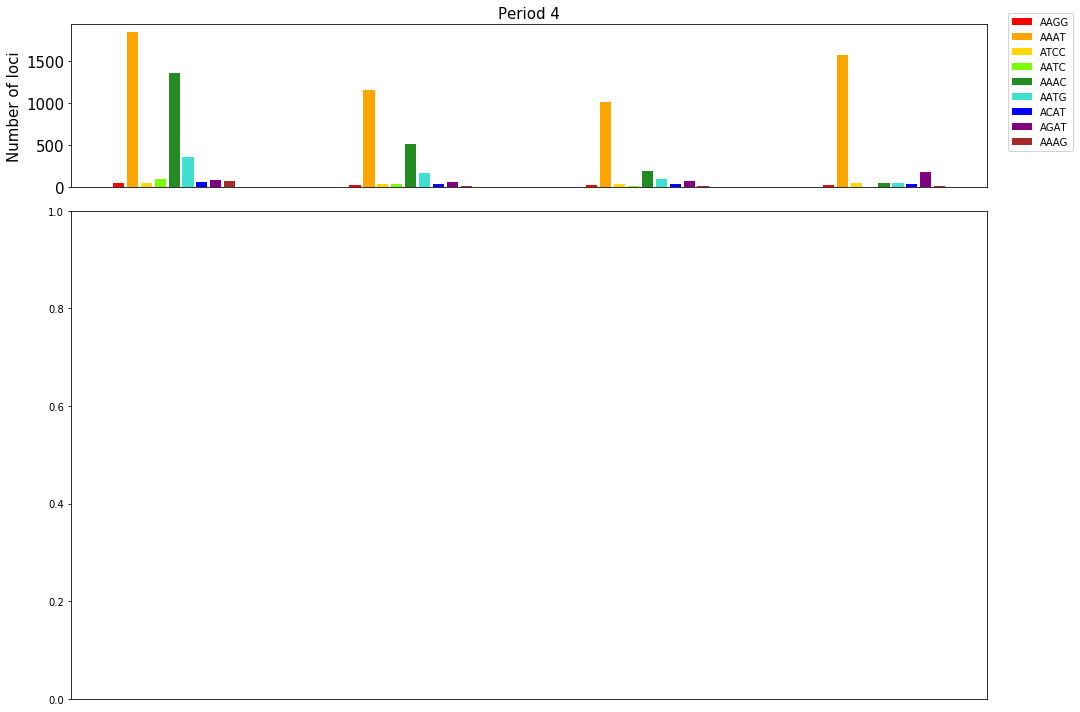

In [35]:
%%time
if __name__ == '__main__':
    main()